In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')



In [51]:
df = pd.read_csv('Heart Attack Data Set.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [52]:
df.rename(columns={'cp': 'chestpain', 'trestbps':'resting_blood_sugar','chol':'serum_cholesterol','fbs':'fasting_blood_suger',
                     'restecg':'resting_electrocardiogram_results','exang':'excercise_induced_angina','ca':'number_of_vessels'
                     },inplace=True)
df.head()

,age,sex,chestpain,resting_blood_sugar,serum_cholesterol,fasting_blood_suger,resting_electrocardiogram_results,thalach,excercise_induced_angina,oldpeak,slope,number_of_vessels,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [53]:
df.thal.unique()

array([1, 2, 3, 0], dtype=int64)

In [54]:
df.isnull().sum()

age                                  0
sex                                  0
chestpain                            0
resting_blood_sugar                  0
serum_cholesterol                    0
fasting_blood_suger                  0
resting_electrocardiogram_results    0
thalach                              0
excercise_induced_angina             0
oldpeak                              0
slope                                0
number_of_vessels                    0
thal                                 0
target                               0
dtype: int64

In [55]:
num = df.select_dtypes(include = 'number')
cat = df.select_dtypes(exclude = 'number')

display(num.head())
display(cat.head())

,age,sex,chestpain,resting_blood_sugar,serum_cholesterol,fasting_blood_suger,resting_electrocardiogram_results,thalach,excercise_induced_angina,oldpeak,slope,number_of_vessels,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


""
0
1
2
3
4


<Axes: xlabel='target', ylabel='count'>

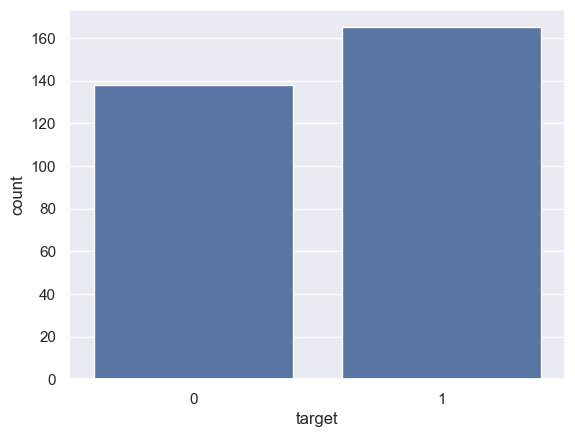

In [56]:
sns.set(style = 'darkgrid')
sns.countplot(x = df.target)

In [57]:
# split into train and test
x = df.drop('target', axis = 1)
y = df.target

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.20, random_state = 98, stratify = y)

In [58]:
def modeller(x_train, y_train, x_test, y_test, show_train_score = None):
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.tree import DecisionTreeClassifier
    from xgboost import XGBClassifier
    from sklearn.svm import SVC
    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import accuracy_score

    # list of algorithms to be used
    algorithms = [RandomForestClassifier(), XGBClassifier(), DecisionTreeClassifier(), SVC(kernel = 'poly'), LogisticRegression()]

    # keep the training and test scores
    scores = []
    train_validator = []

    for i in algorithms:
        model_name = i
        model_name.fit(x_train, y_train)
        model_validate = model_name.predict(x_train)
        train_validator.append(accuracy_score(model_validate, y_train))

        test_perf = model_name.predict(x_test)
        scores.append(accuracy_score(test_perf, y_test))

    # create a table for each algorithms and scores
    compare_table = pd.DataFrame()
    compare_table['Algorithm'] = pd.Series(algorithms)
    compare_table['Accuracy'] = pd.Series(scores)

    if show_train_score == 'show_train':
        compare_table['Training Accuracy'] = pd.Series(train_validator)
        return compare_table.sort_values(by = 'Accuracy', ascending = False), compare_table['Algorithm'][0], compare_table['Algorithm'][1]
    else:
        return compare_table.sort_values(by = 'Accuracy', ascending = False), compare_table['Algorithm'][0], compare_table['Algorithm'][1]


table, model1, model2 = modeller(xtrain, ytrain, xtest, ytest, show_train_score = 'show_train')
table

,Algorithm,Accuracy,Training Accuracy
4,LogisticRegression(),0.901639,0.834711
1,"XGBClassifier(base_score=None, booster=None, c...",0.836066,1.000000
0,"(DecisionTreeClassifier(max_features='sqrt', r...",0.786885,1.000000
2,DecisionTreeClassifier(),0.770492,1.000000
3,SVC(kernel='poly'),0.573770,0.698347


              precision    recall  f1-score   support

           0       0.73      0.89      0.80        90
           1       0.92      0.80      0.86       152

    accuracy                           0.83       242
   macro avg       0.83      0.85      0.83       242
weighted avg       0.85      0.83      0.84       242



<Axes: >

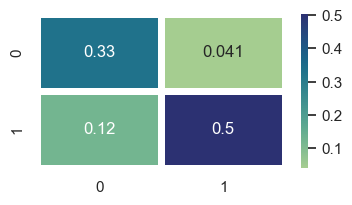

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

raphie_model = LogisticRegression()

raphie_model.fit(xtrain,ytrain)

cross_val = raphie_model.predict(xtrain)
print(classification_report(cross_val, ytrain))

revealer = confusion_matrix(cross_val, ytrain)
plt.figure(figsize = (4,2))
sns.set(style = 'darkgrid')
sns.heatmap(revealer/np.sum(revealer),annot=True, cmap = 'crest', linewidth = 5)

              precision    recall  f1-score   support

           0       0.86      0.92      0.89        26
           1       0.94      0.89      0.91        35

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



<Axes: >

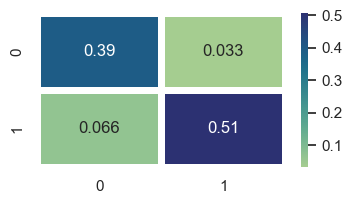

In [60]:
print(classification_report(raphie_model.predict(xtest),ytest))
revealer = confusion_matrix(raphie_model.predict(xtest),ytest)
plt.figure(figsize = (4,2))
sns.set(style = 'darkgrid')
sns.heatmap(revealer/np.sum(revealer),annot = True, cmap = 'crest', linewidth = 5)

In [61]:
# serialise transformers and model
import joblib

joblib.dump(raphie_model, "heartdisease_model.pkl")

['heartdisease_model.pkl']

In [62]:

imported_model = joblib.load('heartdisease_model.pkl')
imported_model

LogisticRegression()

In [63]:
# new patients data to predict the classes of their heart disease
new_patients = df.sample(10).drop('target', axis = 1)
new_patients

,age,sex,chestpain,resting_blood_sugar,serum_cholesterol,fasting_blood_suger,resting_electrocardiogram_results,thalach,excercise_induced_angina,oldpeak,slope,number_of_vessels,thal
47,47,1,2,138,257,0,0,156,0,0.0,2,0,2
130,54,0,2,160,201,0,1,163,0,0.0,2,1,2
150,66,1,0,160,228,0,0,138,0,2.3,2,0,1
117,56,1,3,120,193,0,0,162,0,1.9,1,0,3
109,50,0,0,110,254,0,0,159,0,0.0,2,0,2
206,59,1,0,110,239,0,0,142,1,1.2,1,1,3
178,43,1,0,120,177,0,0,120,1,2.5,1,0,3
87,46,1,1,101,197,1,1,156,0,0.0,2,0,3
175,40,1,0,110,167,0,0,114,1,2.0,1,0,3
121,59,1,0,138,271,0,0,182,0,0.0,2,0,2


In [64]:
imported_model.predict(new_patients)

array([1, 1, 0, 1, 1, 0, 0, 1, 0, 1], dtype=int64)

In [65]:
# batch predict and save thr predicted patients into a new column called predicted patients
new_patients['predicted_patients'] = imported_model.predict(new_patients)
new_patients




,age,sex,chestpain,resting_blood_sugar,serum_cholesterol,fasting_blood_suger,resting_electrocardiogram_results,thalach,excercise_induced_angina,oldpeak,slope,number_of_vessels,thal,predicted_patients
47,47,1,2,138,257,0,0,156,0,0.0,2,0,2,1
130,54,0,2,160,201,0,1,163,0,0.0,2,1,2,1
150,66,1,0,160,228,0,0,138,0,2.3,2,0,1,0
117,56,1,3,120,193,0,0,162,0,1.9,1,0,3,1
109,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
206,59,1,0,110,239,0,0,142,1,1.2,1,1,3,0
178,43,1,0,120,177,0,0,120,1,2.5,1,0,3,0
87,46,1,1,101,197,1,1,156,0,0.0,2,0,3,1
175,40,1,0,110,167,0,0,114,1,2.0,1,0,3,0
121,59,1,0,138,271,0,0,182,0,0.0,2,0,2,1
